In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests 

#### Import Data from OurWorldinData

In [2]:
# Dataset: Share of electricity generated from fossil fuels
# Source: Our World in Data 
# URL: https://ourworldindata.org/grapher/share-electricity-fossil-fuels

electricity_from_fossil_fuels = pd.read_csv("https://ourworldindata.org/grapher/share-electricity-fossil-fuels.csv?v=1&csvType=full&useColumnShortNames=true",
                                            storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
elec_from_fossil_df = electricity_from_fossil_fuels.copy()


### Explore the data

In [3]:
elec_from_fossil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084 entries, 0 to 7083
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            7084 non-null   object 
 1   Code                              5901 non-null   object 
 2   Year                              7084 non-null   int64  
 3   fossil_share_of_electricity__pct  7084 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.5+ KB


In [4]:
elec_from_fossil_df.isna().sum()

Entity                                 0
Code                                1183
Year                                   0
fossil_share_of_electricity__pct       0
dtype: int64

In [5]:
elec_from_fossil_df.head()

,Entity,Code,Year,fossil_share_of_electricity__pct
0,ASEAN (Ember),NaN,2000,80.652916
1,ASEAN (Ember),NaN,2001,80.933680
2,ASEAN (Ember),NaN,2002,82.335700
3,ASEAN (Ember),NaN,2003,83.327515
4,ASEAN (Ember),NaN,2004,84.299990


In [6]:
elec_from_fossil_df['Entity'].value_counts()

Entity
Other CIS (EI)                    40
China                             40
France                            40
Spain                             40
South and Central America (EI)    40
                                  ..
Central African Republic          23
East Timor                        21
Montenegro                        20
South Sudan                       12
Western Sahara                    10
Name: count, Length: 251, dtype: int64

In [7]:
elec_from_fossil_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999], dtype=int64)

In [8]:
elec_from_fossil_df = elec_from_fossil_df[elec_from_fossil_df['Year'] >= 2010]         # Filter dataset to include only data after 2010 

In [9]:
elec_from_fossil_df.shape

(3577, 4)

In [10]:
elec_from_fossil_df.drop_duplicates().shape

(3577, 4)

In [11]:
elec_from_fossil_df.isna().sum()

Entity                                0
Code                                528
Year                                  0
fossil_share_of_electricity__pct      0
dtype: int64

In [12]:
elec_from_fossil_2022 = elec_from_fossil_df[elec_from_fossil_df['Year'] == 2022]       # Filter dataset to include only electricity generation from fossil fuels in 2022

In [13]:
elec_from_fossil_2022.head()

,Entity,Code,Year,fossil_share_of_electricity__pct
22,ASEAN (Ember),NaN,2022,71.917850
47,Afghanistan,AFG,2022,13.541666
86,Africa,NaN,2022,75.112090
125,Africa (EI),NaN,2022,75.048340
150,Africa (Ember),NaN,2022,75.114510


In [14]:
# Save the filtered dataset (2022 only) as a CSV
# This file will later be used in Tableau for visualization

elec_from_fossil_2022.to_csv("elec_from_fossil_2022.csv")

---

### Visualization: Average Share of Electricity from Fossil Fuels for 6 selected countries + world

In [16]:
# Calculate the average share of electricity from fossil fuel over world

world_ave_elc_fossil = elec_from_fossil_df.groupby('Year').agg({'fossil_share_of_electricity__pct':'mean'})

In [17]:
selected_countries = ['France', 'Sweden', 'Germany', 'Poland', 'Spain','Italy']

In [18]:
selected_countries_df = elec_from_fossil_df[elec_from_fossil_df['Entity'].isin(selected_countries)]

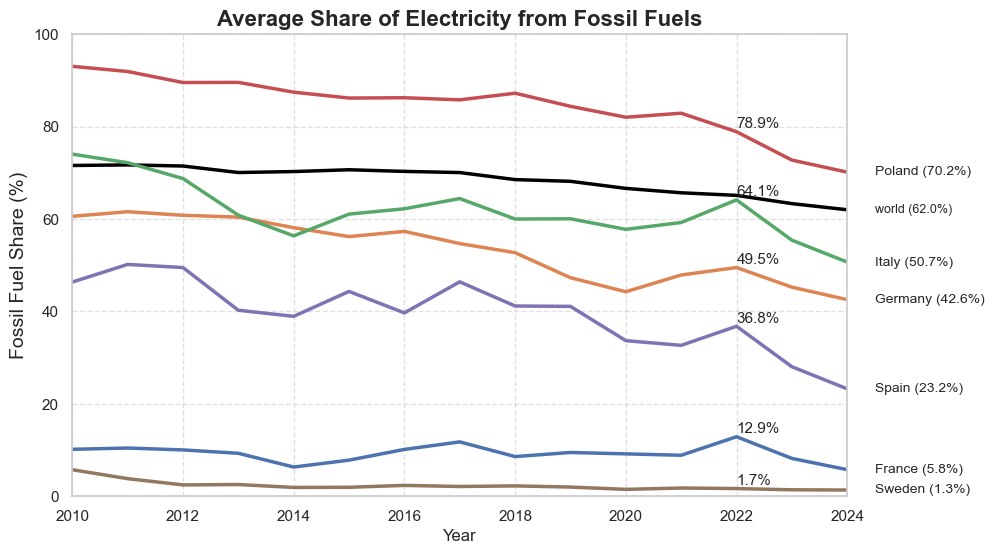

In [19]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))                       # plot the world average overtime(2010-2024)
sns.lineplot(
    data=world_ave_elc_fossil,
    x='Year',
    y='fossil_share_of_electricity__pct',
    color='black',
    linewidth=2.5
)

plt.text(x=2024+0.5,                             # write a text next to the line
             y= world_ave_elc_fossil.loc[2024 , 'fossil_share_of_electricity__pct'],
             s= f"world ({world_ave_elc_fossil.loc[2024 , 'fossil_share_of_electricity__pct']:.1f}%)",
             fontsize=9,
             va='center')

sns.lineplot(                                    # plot the average CO2 emission for selected countries overtime(2010-2024)
    data=selected_countries_df,
    x='Year',
    y='fossil_share_of_electricity__pct',
    color='crimson',
    hue='Entity',
    linewidth=2.5
)


for Entity in selected_countries:                 # write the values and the name of countries next to the line
    y_val = selected_countries_df.loc[
        (selected_countries_df['Year'] == 2024) & 
        (selected_countries_df['Entity'] == Entity),
        'fossil_share_of_electricity__pct']
    plt.text(x=2024+0.5,
             y=y_val.values[0],
             s= f"{Entity} ({y_val.values[0]:.1f}%)",
             fontsize=10,
             va='center')

for Entity in selected_countries:                 # write the values next to the point
    y_val = selected_countries_df.loc[
        (selected_countries_df['Year'] == 2022) & 
        (selected_countries_df['Entity'] == Entity),
        'fossil_share_of_electricity__pct']
    plt.text(x=2022,
             y=y_val.values[0]+1.7,
             s= f"{y_val.values[0]:.1f}%",
             fontsize=11,
             va='center')

plt.title("Average Share of Electricity from Fossil Fuels", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Fossil Fuel Share (%)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.6)

plt.xlim(world_ave_elc_fossil.index.min(), world_ave_elc_fossil.index.max())
plt.ylim(0, 100)

plt.legend([],[], frameon=False)      # to remove legend
plt.savefig("chart06.png", dpi=300, bbox_inches='tight')
plt.show()

---

## Visualization:The amount of CO2 produced per KWh in 2022

In [20]:
carbon_intensity = pd.read_csv("https://ourworldindata.org/grapher/carbon-intensity-electricity.csv?v=1&csvType=full&useColumnShortNames=true",
                 storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
carbon_intensity_df = carbon_intensity.copy()

In [21]:
carbon_intensity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5737 non-null   object 
 1   Code                     5174 non-null   object 
 2   Year                     5737 non-null   int64  
 3   co2_intensity__gco2_kwh  5737 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 179.4+ KB


In [22]:
carbon_intensity_df = carbon_intensity_df[carbon_intensity_df['Year'] >= 2010]

In [23]:
carbon_int_6countries_df = carbon_intensity_df[(carbon_intensity_df['Entity'].isin(selected_countries)) & (carbon_intensity_df['Year'] ==2022)]

In [24]:
filtered_df = carbon_int_6countries_df.sort_values(by="co2_intensity__gco2_kwh",
                                                   ascending=False)

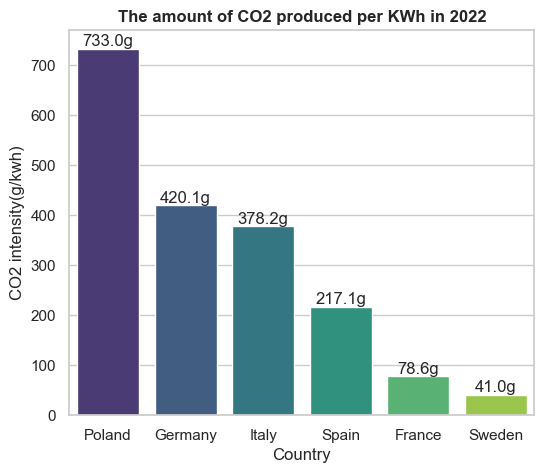

In [25]:
plt.figure(figsize=(6,5))
sns.barplot(data=filtered_df,
            y='co2_intensity__gco2_kwh',
            x='Entity',
            palette='viridis',
            hue='Entity'
           )
for i,(entity,row) in enumerate(filtered_df.iterrows()):
    plt.text(x=i,
             y= row['co2_intensity__gco2_kwh'] + 5,
             s=f"{row['co2_intensity__gco2_kwh']:.1f}g",
             ha='center'
            )
plt.title('The amount of CO2 produced per KWh in 2022', fontsize=12, weight='bold')
plt.xlabel('Country')
plt.ylabel('CO2 intensity(g/kwh)')
plt.legend([],[], frameon=False)
plt.show()

In [26]:
filtered_df

,Entity,Code,Year,co2_intensity__gco2_kwh
4234,Poland,POL,2022,732.978700
2086,Germany,DEU,2022,420.106540
2662,Italy,ITA,2022,378.163240
4924,Spain,ESP,2022,217.133900
1892,France,FRA,2022,78.550240
5020,Sweden,SWE,2022,41.028603


#### Build a merged Dataframe for CO2_intensity and fossil_share_of_electricity 
##### This data is used for visualization with Tableau

In [27]:
carbon_intensity_2022 = carbon_intensity[carbon_intensity['Year']==2022]

In [28]:
fossil_share_2022 = electricity_from_fossil_fuels[electricity_from_fossil_fuels['Year']==2022]

In [29]:
data_world_2022 = pd.merge(carbon_intensity_2022,fossil_share_2022,on='Entity', how='inner')
data_world_2022

,Entity,Code_x,Year_x,co2_intensity__gco2_kwh,Code_y,Year_y,fossil_share_of_electricity__pct
0,ASEAN (Ember),NaN,2022,554.267640,NaN,2022,71.917850
1,Afghanistan,AFG,2022,125.000000,AFG,2022,13.541666
2,Africa,NaN,2022,550.250200,NaN,2022,75.112090
3,Africa (Ember),NaN,2022,550.283200,NaN,2022,75.114510
4,Albania,ALB,2022,24.390245,ALB,2022,0.000000
...,...,...,...,...,...,...,...
232,Vietnam,VNM,2022,415.487950,VNM,2022,50.537514
233,World,OWID_WRL,2022,489.745400,OWID_WRL,2022,61.384220
234,Yemen,YEM,2022,584.158400,YEM,2022,83.168320
235,Zambia,ZMB,2022,111.967130,ZMB,2022,11.093991


In [30]:
data_world_2022 = data_world_2022.drop(columns=['Code_x','Code_y','Year_y'])

In [31]:
data_world_2022 = data_world_2022.rename(columns={'Year_x':'Year',
                        'co2_intensity__gco2_kwh':'CO2_intensity(g/kwh)',
                        'fossil_share_of_electricity__pct':'fossil_share(%)'}) 

In [32]:
data_world_2022

,Entity,Year,CO2_intensity(g/kwh),fossil_share(%)
0,ASEAN (Ember),2022,554.267640,71.917850
1,Afghanistan,2022,125.000000,13.541666
2,Africa,2022,550.250200,75.112090
3,Africa (Ember),2022,550.283200,75.114510
4,Albania,2022,24.390245,0.000000
...,...,...,...,...
232,Vietnam,2022,415.487950,50.537514
233,World,2022,489.745400,61.384220
234,Yemen,2022,584.158400,83.168320
235,Zambia,2022,111.967130,11.093991


In [33]:
# Save the filtered dataset (2022 only) as a CSV
# This file will later be used in Tableau for visualization

data_world_2022.to_csv('data_world_2022.csv', index=False)

---

### Explore and download the full data behind the Global EV Outlook

In [57]:
# Share of electric car stocks
# Source: Our World in Data 
# URL: https://ourworldindata.org/grapher/share-car-stocks-electric

#ev_share_df = pd.read_csv("data/share-car-stocks-electric.csv")

In [35]:
ev_share_df = pd.read_csv("C:/Users/Fariba/Zahra/Final_Project_Data/share-car-stocks-electric.csv")

In [36]:
ev_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 30 non-null     object 
 1   Code                                   30 non-null     object 
 2   Year                                   30 non-null     int64  
 3   Share of car stocks that are electric  30 non-null     float64
 4   time                                   30 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ KB


In [37]:
ev_share_df.sample(10)

,Entity,Code,Year,Share of car stocks that are electric,time
25,Sweden,SWE,2024,13.00,2024
5,Chile,CHL,2024,0.26,2024
13,India,IND,2024,0.48,2024
21,Poland,POL,2024,1.10,2024
12,Iceland,ISL,2024,18.00,2024
14,Israel,ISR,2024,5.90,2024
26,Switzerland,CHE,2024,7.30,2024
28,United Kingdom,GBR,2024,6.40,2024
17,Mexico,MEX,2024,0.30,2024
20,Norway,NOR,2024,32.00,2024


---

## Top Lithium Producing Countries

In [46]:
# Global lithium production
# Source: Our World in Data 
# https://ourworldindata.org/grapher/lithium-production

Li_share_countries = pd.read_csv("C:/Users/Fariba/Zahra/Final_Project_Data/lithium-production.csv")

In [47]:
Li_share_countries = Li_share_countries[(Li_share_countries['Year'] == 2024)]

In [48]:
Li_share_countries

,Entity,Code,Year,Lithium production - kt
29,Argentina,ARG,2024,18000.0000
59,Asia,NaN,2024,41000.0000
89,Australia,AUS,2024,88000.0000
119,Brazil,BRA,2024,10000.0000
149,Chile,CHL,2024,56928.4320
179,China,CHN,2024,41000.0000
209,Europe,NaN,2024,380.0000
239,High-income countries,NaN,2024,146228.9900
269,Lower-middle-income countries,NaN,2024,22000.0000
299,North America,NaN,2024,920.5630


In [49]:
# Filter countries
key_entities = ['USA', 'Argentina', 'Australia', 'Chile', 'China', 'Zimbabwe']
Li_share_countries = Li_share_countries[(Li_share_countries['Year'] == 2024) &
                    (Li_share_countries['Entity'].isin(key_entities + ['World']))]

Li_share_countries = Li_share_countries.copy()

# Calculate share percentage
Li_share_countries.loc[:,'share_pct'] = 100 * Li_share_countries['Lithium production - kt'] /Li_share_countries.loc[Li_share_countries['Entity'] == 'World', 'Lithium production - kt'].values[0]


In [50]:
filtered = Li_share_countries[Li_share_countries['Entity'].isin(key_entities)]

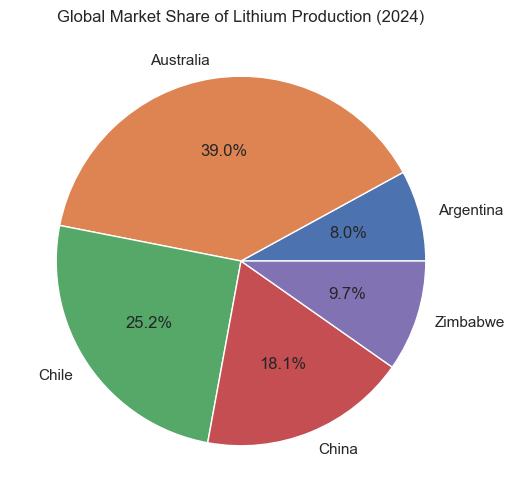

In [56]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(filtered['share_pct'], labels=filtered['Entity'], autopct='%1.1f%%')
plt.title('Global Market Share of Lithium Production (2024)')
plt.show()


---